In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [22]:
df=pd.read_csv('product b.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [23]:
sales_b= df.drop(['Product Name','Product Category','Month','Year','Market Size','Month No.', 'Marketing Expense'],axis=1)

In [24]:
sales_b.shape

(60, 1)

In [25]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [26]:
sales_b['Sales'].sum()

70016882

Text(0.5, 1.0, 'Product B')

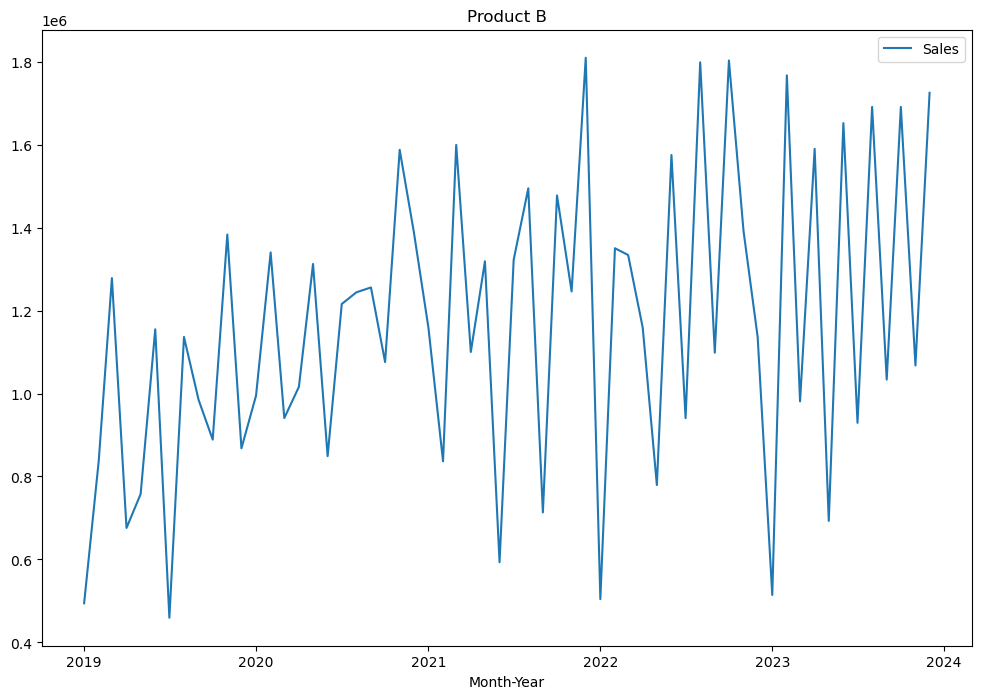

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_b)
plt.title('Product B')

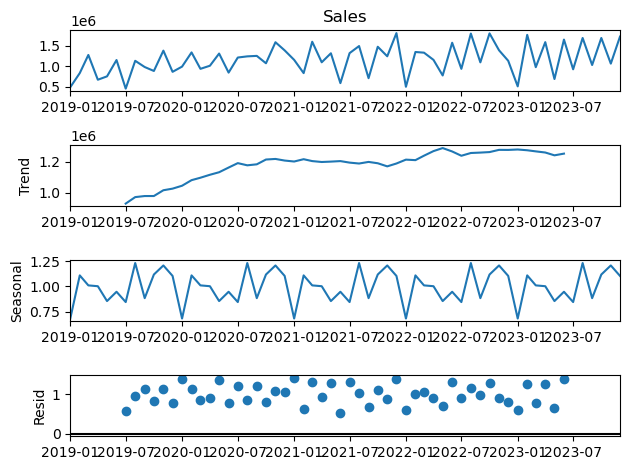

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_b['Sales'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

In [29]:
train= sales_b[:57]
test=sales_b[57:]

In [30]:
len(test)

3

In [31]:
model=ExponentialSmoothing(train,trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
pred=model.forecast(3)

In [33]:
pred

2023-10-01    1.340665e+06
2023-11-01    1.649581e+06
2023-12-01    1.558579e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product B')

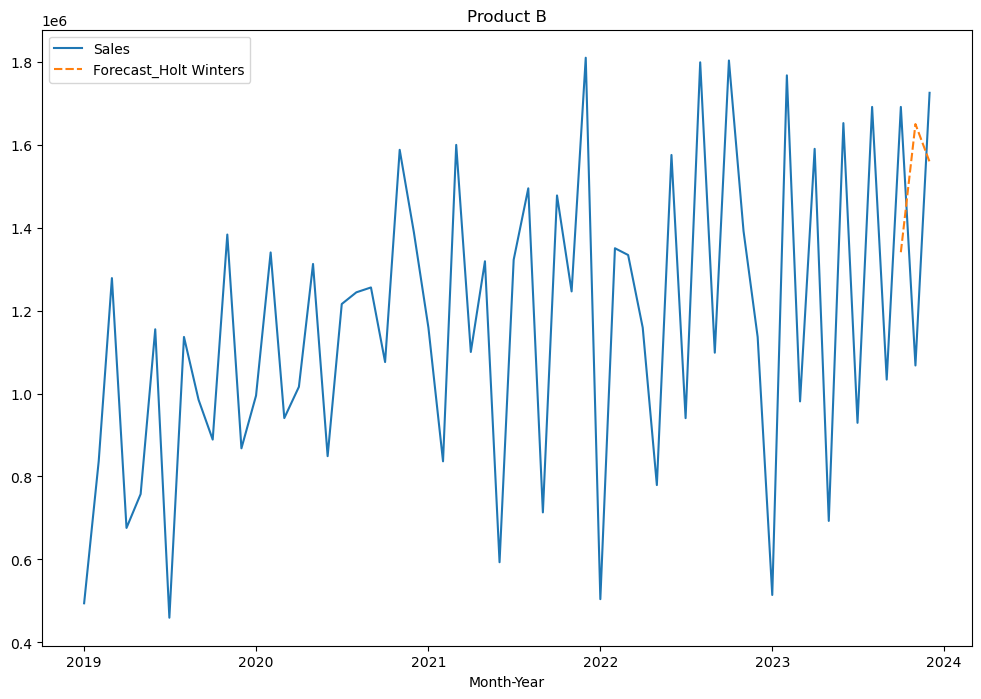

In [34]:
sales_b['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_Holt Winters']])
plt.title('Product B')

In [35]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 366205.9496780277
MAPE - Holt Winters: 0.28290294979484965
MSE - Holt Winters: 163020326048.42468
RMSE - Holt Winters: 403757.75664180703


In [36]:
sales_b.tail(3)

,Sales,Forecast_Holt Winters
Month-Year,,
2023-10-01,1690948,1.340665e+06
2023-11-01,1067615,1.649581e+06
2023-12-01,1724948,1.558579e+06


# FORECASTING

In [37]:
model_forecast=ExponentialSmoothing(sales_b['Sales'],trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
forecast_=model_forecast.forecast(3)

In [39]:
forecast_

2024-01-01    8.837242e+05
2024-02-01    1.432571e+06
2024-03-01    1.306250e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product B')

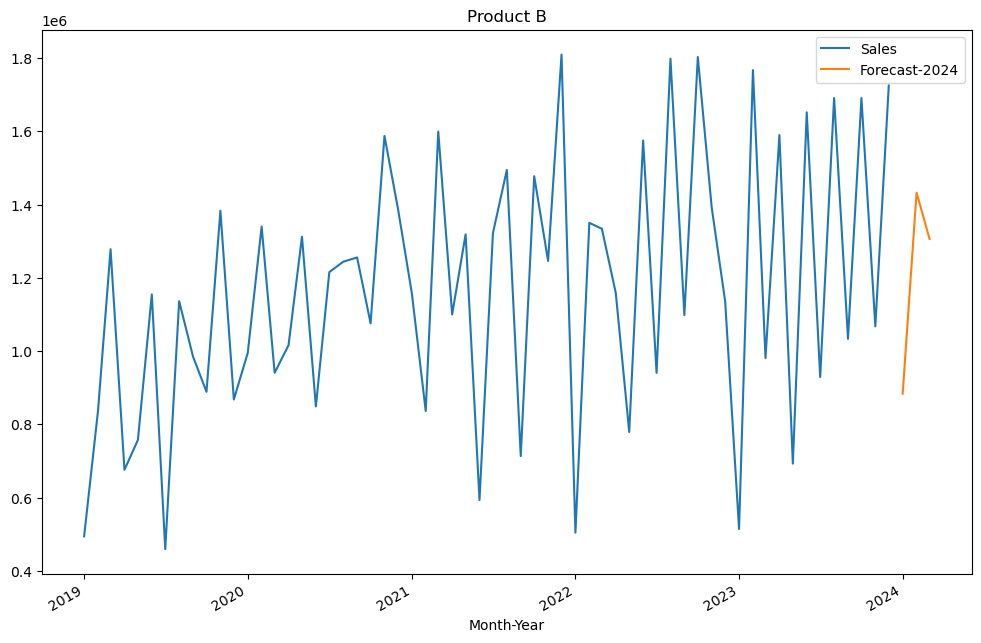

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales']])
forecast_.plot(legend=True, label='Forecast-2024')
plt.title('Product B')